
Specific heat:
(Tc, nu, beta, beta/nu) = (1.2035, 0.83, 0.33, 0.4)
values: Tc, nu, zeta, omega, a
[1.2, 2.5, 0.33, 0.15, 0.23, 0.0, 0.0]
1.2

Magnetization:
(Tc, nu, beta, beta/nu) = (1.2035, 0.83, 0.11, 0.1333)
values: Tc, nu, zeta, omega, a
[1.2, 1.25, -0.18, 0.13, 0.15, 0.19, 0.15]
1.2
Range of temperature [1.17       1.17128205 1.1725641  1.17384615 1.17512821 1.17641026
 1.17769231 1.17897436 1.18025641 1.18153846 1.18282051 1.18410256
 1.18538462 1.18666667 1.18794872 1.18923077 1.19051282 1.19179487
 1.19307692 1.19435897 1.19564103 1.19692308 1.19820513 1.19948718
 1.20076923 1.20205128 1.20333333 1.20461538 1.20589744 1.20717949
 1.20846154 1.20974359 1.21102564 1.21230769 1.21358974 1.21487179
 1.21615385 1.2174359  1.21871795 1.22      ].

Susceptibility:
(Tc, nu, gamma, gamma/nu) = (1.2035, 0.83, 1.44, 1.733)
Susceptibility:
values: Tc, nu, zeta, omega, a
[1.2034, 0.943, 1.44, 0.11, 0.93, 0.05, 0.1]
1.2034


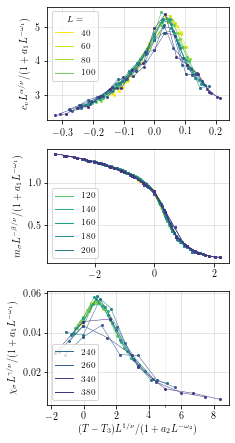

In [8]:
#!/usr/bin/env python
# coding: utf-8

#matplotlib inline
from __future__ import division
import numpy as np
from numpy.random import rand
from numpy import linalg as LA
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import math
import sys
import os
from random import shuffle
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.optimize import fmin
from scipy.optimize import fsolve
from scipy import interpolate
from scipy.optimize import curve_fit
import scipy.optimize as opt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from scipy.signal import savgol_filter
from random import gauss
import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


from matplotlib import rc
rc('font',**{'family':'sans-serif', 'size' : 10}) #, 'sans-serif':['Arial']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

color_red = (0.73, 0.13869999999999993, 0.)
color_orange = (1., 0.6699999999999999, 0.)
color_green = (0.14959999999999996, 0.43999999999999995, 0.12759999999999994)
color_blue = (0.06673600000000002, 0.164512, 0.776)
color_purple = (0.25091600000000003, 0.137378, 0.29800000000000004)
color_ocker = (0.6631400000000001, 0.71, 0.1491)
color_pink = (0.71, 0.1491, 0.44730000000000003)
color_brown = (0.651, 0.33331200000000005, 0.054683999999999955)

color_all = [color_red, color_orange, color_green, color_blue, color_purple, color_ocker,color_pink, color_brown]


#fit_result_scaling
val_c = [ 1.20,  2.5,  0.33,  0.15, 0.23, 0.0, 0.0];
val_m = [1.20, 1.25, -0.18,  0.13,  0.15,  0.19,  0.15];
val_chi = [1.2034, 0.943, 1.44, 0.11, 0.93, 0.05, 0.1];


from funcfssa import autoscale, scaledata   #usual scaling
from funcfssa2 import autoscale2, scaledata2  #correction in y
from funcfssa3 import autoscale3, scaledata3  #added correction in x

j2 = 1.0
j6 = 1.0
Kc = 0.0
lambda3 = 2.1
q_Q = 1
N_og = [40, 60, 80, 100, 120, 140, 160, 180, 200, 240, 260, 340, 380]
N_list = N_og

####
#code
###

cv_ind = 1
chi_ind = 10 #for chi_sigma
m_ind = 9 #for m_sigma


data = np.load('Delta1_data_v2.npy',allow_pickle=True)


######
#-----------------------------------------------------------------------------------------------------------------------
#######
#parameters of the code
######
#-----------------------------------------------------------------------------------------------------------------------
######



#size_investigate = [20, 32]
Blocks = ['*','o', 'v', 'd','s','+', 'x']
#colors_size = ['blue', 'red', 'green', 'brown']

cNorm  = colors.Normalize(vmin=0, vmax=1)
#scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='brg_r')
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='viridis_r')
colors_size = [scalarMap.to_rgba(i/(len(N_list)+ 2-1)) for i in range(len(N_list))]

### scaling of specific heat
###

ls = N_list
a_arr = []
da_arr = []
flat_temp = []
ind = cv_ind  #here choose your fit
scaleC = 1
rhos = np.array(data[-1][0])


for i in range(len(N_list)):
    i_og = i 
    prelim_y = (N_list[i]**(2*scaleC))*data[i_og][2*ind + 1]
    prelim_x = data[i_og][0] 
    
    spl_alt = InterpolatedUnivariateSpline(prelim_x, prelim_y, k=5)
    
    a_arr.append(spl_alt(rhos))
    da_arr.append(0.01*spl_alt(rhos))
    
a_arr = np.array(a_arr)
da_arr = np.array(da_arr)

print('\nSpecific heat:')
print('(Tc, nu, beta, beta/nu) = (1.2035, 0.83, 0.33, 0.4)')



print('values: Tc, nu, zeta, omega, a')
print(val_c)

noisy_auto_scaled_data =scaledata3(ls, rhos, a_arr, da_arr, *val_c)


fig = plt.figure(figsize = (3.375,6.26) )
ax1 = plt.subplot(3, 1, 1)

#specific heat
for i in range(len(N_list)):
    #hand test
    #noisy_auto_scaled_data =scaledata2(ls, rhos, a_arr, da_arr, *testV)
    y_val = (noisy_auto_scaled_data.y.T)[:,i]
    x_val = (noisy_auto_scaled_data.x.T)[:,i]

    #new_dat = scaledata2(ls, rhos, a_arr, da_arr, *[1.203, 5/6, 1/3, 0.05, 0.05])
    #y_val = (new_dat.y.T)[:,i]
    #x_val = (new_dat.x.T)[:,i]
    ax1.plot(x_val, y_val, marker ='o', markersize = 2, linestyle = '-', linewidth = 0.5,  color=colors_size[i])

#ax1.set_xlabel(r"$(T - T_{3})L^{1/\nu}/(1 + a_2 L^{-\omega_2})$", fontsize=10);
ax1.set_ylabel(r'$c_{v}L^{\alpha/\nu}/(1 + a_1 L^{-\omega_1})$ ', fontsize=10);

# ax1.set_xlabel(r"$\tilde{t} = (T - T_{potts})L^{1/\nu} (1 + a_2 L^{-\omega_2})^{-1}$", fontsize=10);
# ax1.set_ylabel(r'Scaled Specific Heat $\tilde{c}_{v} = L^{\beta/\nu} c_{v} (1 + a_1 L^{-\omega_1})^{-1}$ ', fontsize=10);


#do the legend and append at the end
# patches_lg = []
# for i in range(len(N_list)):
#     patches_lg.append(patches.Patch(color=colors_size[i], label='L='+str(int(N_list[i]))))
#ax.legend(handles=patches_lg, loc='upper right', bbox_to_anchor=(0.98,0.95), ncol=1,fontsize = 10)

patches_lg = []
for i in range(4):
    patches_lg.append(Line2D([0], [0], color=colors_size[i], linewidth = 1, linestyle = '-', label='$'+str(int(N_list[i]))+'$') )
ax1.legend(handles=patches_lg, loc='upper left', title = '$L = $', title_fontsize = 9, ncol=1, fontsize = 9)

ax1.xaxis.set_minor_locator(MultipleLocator(5))
ax1.grid(which='major', axis='both', linestyle='-', alpha = 0.4)
ax1.grid(which='minor', axis='both', linestyle='-', alpha = 0.2)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.tick_params(axis='both', which='minor', labelsize=10)

# fig.tight_layout()
#
# plt.savefig('./scaledCV.png', format='png', dpi = 100, bbox_inches='tight')
# plt.show()

### scaling of magnetization
###

ls = N_list
a_arr = []
da_arr = []
flat_temp = []
ind = m_ind  #here choose your fit
scaleC = 0
rhos = np.array(data[-1][0])


for i in range(len(N_list)):
    i_og = i 
    prelim_y = (N_list[i]**(2*scaleC))*data[i_og][2*ind + 1]
    prelim_x = data[i_og][0] 
    
    spl_alt = InterpolatedUnivariateSpline(prelim_x, prelim_y, k=5)
    
    a_arr.append(spl_alt(rhos))
    da_arr.append(0.01*spl_alt(rhos))
    
a_arr = np.array(a_arr)
da_arr = np.array(da_arr)

print('\nMagnetization:')
print('(Tc, nu, beta, beta/nu) = (1.2035, 0.83, 0.11, 0.1333)')


print('values: Tc, nu, zeta, omega, a')
print(val_m)

noisy_auto_scaled_data =scaledata3(ls, rhos, a_arr, da_arr, *val_m)

ax2 = plt.subplot(3, 1, 2)

#specific heat
for i in range(len(N_list)):
    y_val = (noisy_auto_scaled_data.y.T)[:,i]
    x_val = (noisy_auto_scaled_data.x.T)[:,i]
    ax2.plot(x_val, y_val, marker ='o', markersize = 2, linestyle = '-', linewidth = 0.5, color=colors_size[i])
    ax2.plot(x_val, y_val, marker ='o', markersize = 2, linestyle = '-', linewidth = 0.5, color=colors_size[i])
    ax2.plot(x_val, y_val, marker ='o', markersize = 2, linestyle = '-', linewidth = 0.5, color=colors_size[i])

#ax2.set_xlabel(r"$(T - T_{3})L^{1/\nu}/(1 + a_2 L^{-\omega_2})$", fontsize=10);
ax2.set_ylabel(r'$m_{\sigma}L^{-\beta/\nu} /(1 + a_1 L^{-\omega_1})$ ', fontsize=10);


#do the legend and append at the end
patches_lg = []
for i in range(4, 9):
    patches_lg.append(Line2D([0], [0], color=colors_size[i], linewidth = 1, linestyle = '-', label='$'+str(int(N_list[i]))+'$') )

ax2.legend(handles=patches_lg, loc='lower left', title_fontsize = 9, ncol=1,fontsize = 9)

#ax2.legend(handles=patches_lg, loc='best', ncol=1,fontsize = 9)
#ax2.legend(handles=patches_lg, loc='best', ncol=1,fontsize = 9)
# bbox_to_anchor=(0.98,0.95
ax2.xaxis.set_minor_locator(MultipleLocator(5))
ax2.grid(which='major', axis='both', linestyle='-', alpha = 0.4)
ax2.grid(which='minor', axis='both', linestyle='-', alpha = 0.2)
ax2.tick_params(axis='both', which='both', labelsize=10)

# fig.tight_layout()
#
# plt.savefig('./scaledMag.png', format='png', dpi = 100, bbox_inches='tight')
# plt.show()

### scaling of susceptibility
###

ls = N_list
a_arr = []
da_arr = []
flat_temp = []
ind = chi_ind  #here choose your fit
scaleC = 1
# actual range
print(f'Range of temperature {data[2][0]}.')
tstart = 1.20
prelim_x_p = data[-1][0] 
uind = np.argmin(np.absolute(prelim_x_p - tstart))
rhos = np.array(data[-1][0])[uind:]


for i in range(len(N_list)):
    i_og = i 

    prelim_x_p = data[i_og][0] 
    uind = np.argmin(np.absolute(prelim_x_p - tstart))
    prelim_y = (N_list[i]**(2*scaleC))*data[i_og][2*ind + 1][uind:]    
    prelim_x = prelim_x_p[uind:]
    
    spl_alt = InterpolatedUnivariateSpline(prelim_x, prelim_y, k=5)
    
    a_arr.append(spl_alt(rhos))
    da_arr.append(0.01*spl_alt(rhos))
    
a_arr = np.array(a_arr)
da_arr = np.array(da_arr)

# scaling function ansatz autoscale (no corrections to scaling) or autoscale2 (corrections to scaling on x or y) or autoscale3 (corrections to scaling on both x and y)
print('\nSusceptibility:')
print('(Tc, nu, gamma, gamma/nu) = (1.2035, 0.83, 1.44, 1.733)')


print('Susceptibility:')
print('values: Tc, nu, zeta, omega, a')
print(val_chi)


noisy_auto_scaled_data =scaledata3(ls, rhos, a_arr, da_arr, *val_chi)


#fig, ax = plt.subplots31,1igsize=(15,10))
ax3 = plt.subplot(3, 1, 3)
#fig.set_size_inches(12,6)
#fig.set_dpi(100)

#susceptibility
for i in range(len(N_list)):
    #y_val = (N_list[i]**(2*scale))*data_thermo[i][:,ind]
    #x_val = range_x[0]
    y_val = (noisy_auto_scaled_data.y.T)[:,i]
    x_val = (noisy_auto_scaled_data.x.T)[:,i]
    ax3.plot(x_val, y_val, marker ='o', markersize = 2, linestyle = '-', linewidth = 0.5,  color=colors_size[i])

ax3.set_xlabel(r"$(T - T_{3})L^{1/\nu}/(1 + a_2 L^{-\omega_2})$", fontsize=10);
ax3.set_ylabel(r'$\chi_{\sigma}L^{\gamma/\nu} /(1 + a_1 L^{-\omega_1})$ ', fontsize=10);

#do the legend and append at the end
patches_lg = []
for i in range(9, 13):
    patches_lg.append(Line2D([0], [0], color=colors_size[i], linewidth = 1, linestyle = '-', label='$'+str(int(N_list[i]))+'$') )

ax3.legend(handles=patches_lg, loc='lower left', title_fontsize = 9, ncol=1,fontsize = 9)


#do the legend and append at the end
# patches_lg = []
# for i in range(len(N_list)):
#     #patches_lg.append(patches.Patch(color=colors_size[i], label='L='+str(int(N_list[i]))))
#     patches_lg.append(Line2D([0], [0], color=colors_size[i], linewidth = 1, linestyle = '-', label='$'+str(int(N_list[i]))+'$') )

#ax3.legend(handles=patches_lg, loc='upper right', bbox_to_anchor=(0.98,0.95), ncol=1,fontsize = 10)
ax3.xaxis.set_minor_locator(MultipleLocator(5))
ax3.grid(which='major', axis='both', linestyle='-', alpha = 0.4)
ax3.grid(which='minor', axis='both', linestyle='-', alpha = 0.2)
ax3.tick_params(axis='both', which='both', labelsize=10)

fig.tight_layout()

plt.savefig('./scaledSusc.png', format='png', dpi = 600, bbox_inches='tight')
#    plt.show()
